In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

2024-11-18 21:39:43.212080: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 21:39:43.212967: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 21:39:43.215450: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 21:39:43.220959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731965983.229729      25 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731965983.23

In [ ]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 54.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 24.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 56.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 52.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 19.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 50.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 52.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 12.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 53.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 50.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 41.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.4 MB/s eta 0:00:0000:0100

In [ ]:
# Load the merged dataset
data = pd.read_csv('ridership_and_weather_data_combined_2018_to_2023.csv')

# Display the first few rows to verify the data
print(data.head())

         date  hour Origin Station Destination Station  Number of Exits  Year  \
0  2018-01-01     0           12TH                12TH                3  2018   
1  2018-01-01     0           12TH                16TH                1  2018   
2  2018-01-01     0           12TH                BAYF                1  2018   
3  2018-01-01     0           12TH                CAST                3  2018   
4  2018-01-01     0           12TH                CIVC                2  2018   

    county  temperature_2m  precipitation  weather_code  wind_speed_10m  \
0  Alameda             9.0            0.0             1             6.2   
1  Alameda             9.0            0.0             1             6.2   
2  Alameda             9.0            0.0             1             6.2   
3  Alameda             9.0            0.0             1             6.2   
4  Alameda             9.0            0.0             1             6.2   

   wind_direction_10m  relative_humidity_2m weather_category  

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['holiday_name'].fillna('No Holiday', inplace=True)

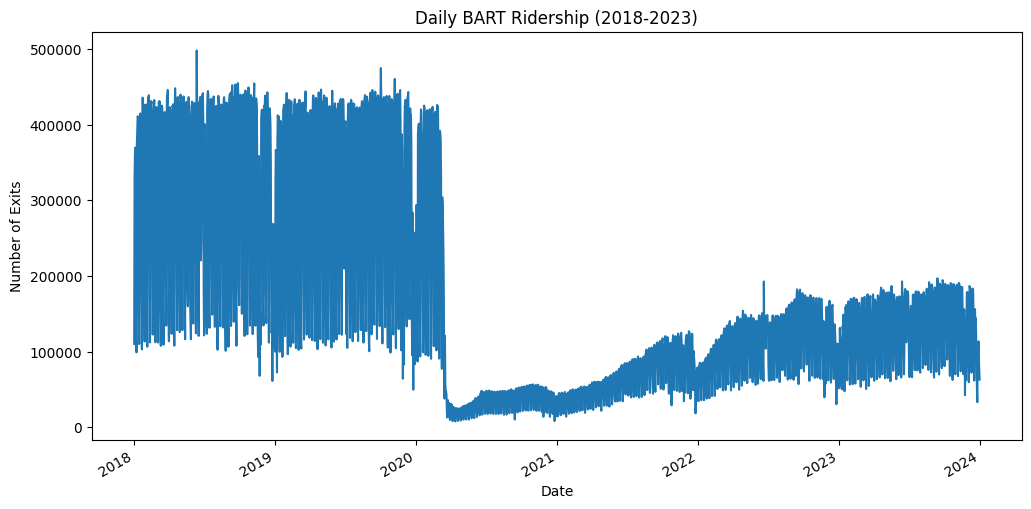

In [ ]:
# Aggregate ridership data by date
daily_ridership = data.groupby('date')['Number of Exits'].sum()

# Plot the daily ridership trend
plt.figure(figsize=(12, 6))
daily_ridership.plot()
plt.title('Daily BART Ridership (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Number of Exits')
plt.show()

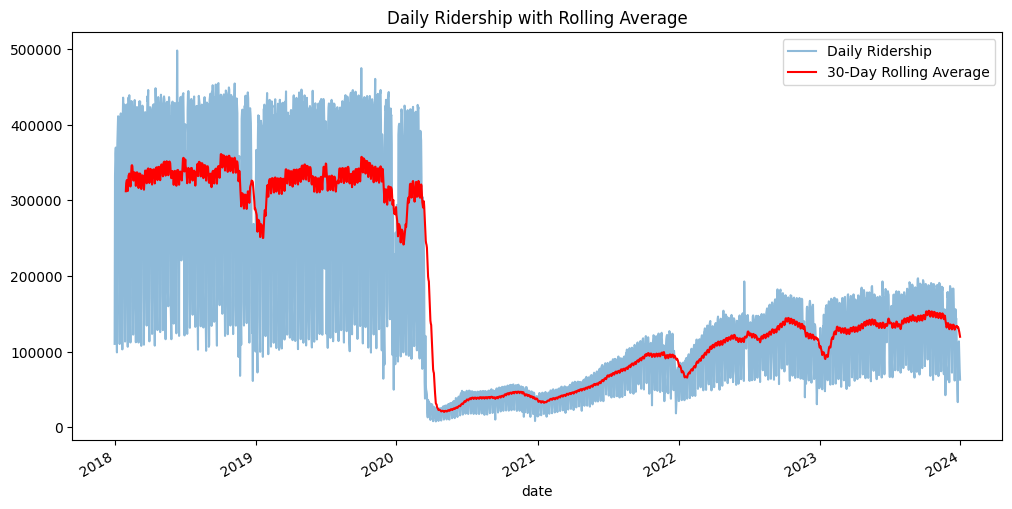

In [ ]:
daily_ridership = data.groupby('date')['Number of Exits'].sum()
daily_ridership_rolling = daily_ridership.rolling(window=30).mean()  # 30-day rolling average

plt.figure(figsize=(12, 6))
daily_ridership.plot(alpha=0.5, label='Daily Ridership')
daily_ridership_rolling.plot(label='30-Day Rolling Average', color='red')
plt.legend()
plt.title('Daily Ridership with Rolling Average')
plt.show()


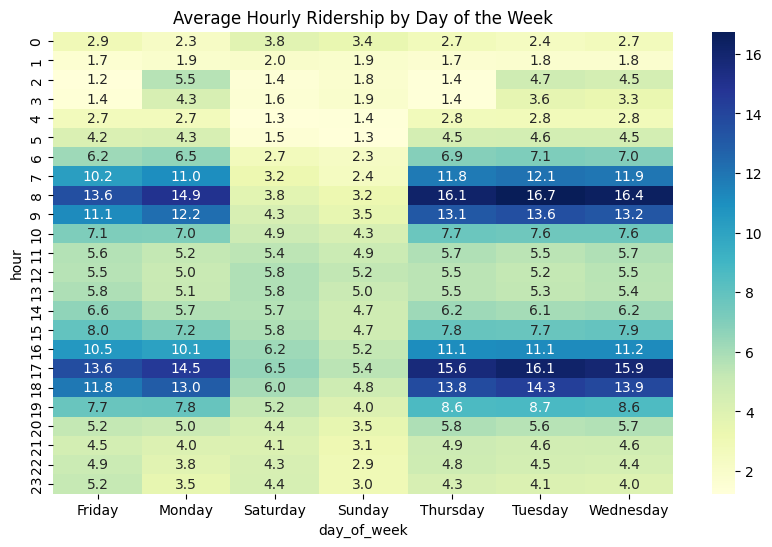

In [ ]:
# Create pivot table for ridership by hour and day of the week
data['day_of_week'] = pd.to_datetime(data['date']).dt.day_name()
hourly_trends = data.pivot_table(values='Number of Exits',
                                 index='hour', columns='day_of_week', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_trends, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Average Hourly Ridership by Day of the Week')
plt.show()

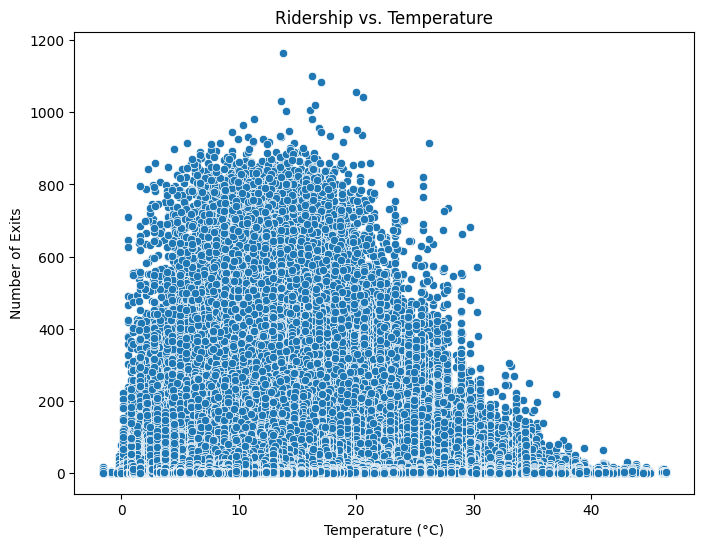

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature_2m', y='Number of Exits', data=data)
plt.title('Ridership vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Exits')
plt.show()

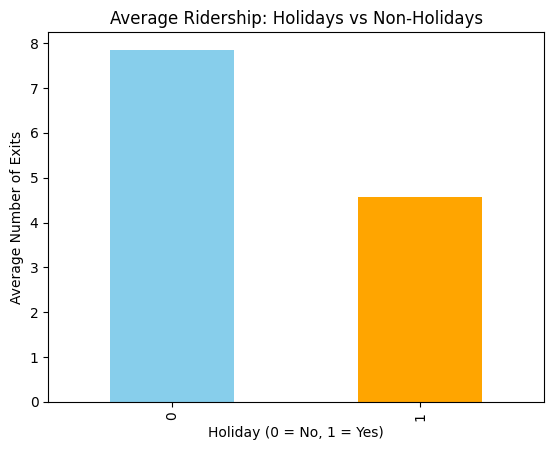

In [ ]:
holiday_ridership = data.groupby('is_holiday')['Number of Exits'].mean()

# Plot bar chart for average ridership on holidays vs non-holidays
holiday_ridership.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Ridership: Holidays vs Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Average Number of Exits')
plt.show()

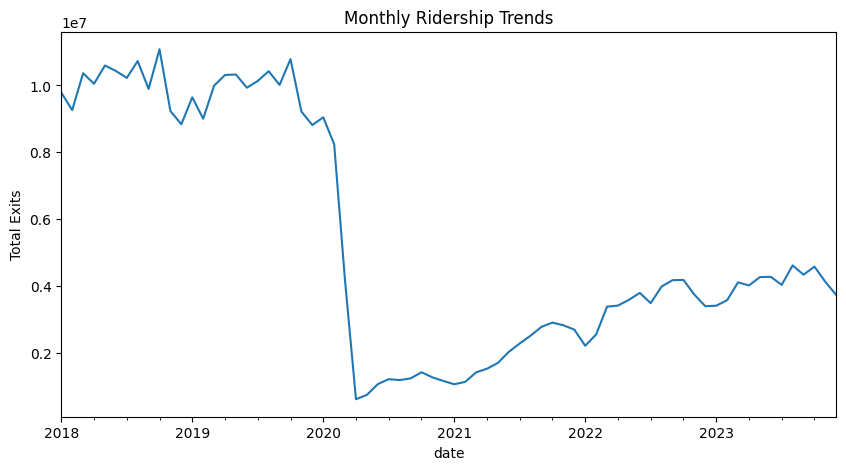

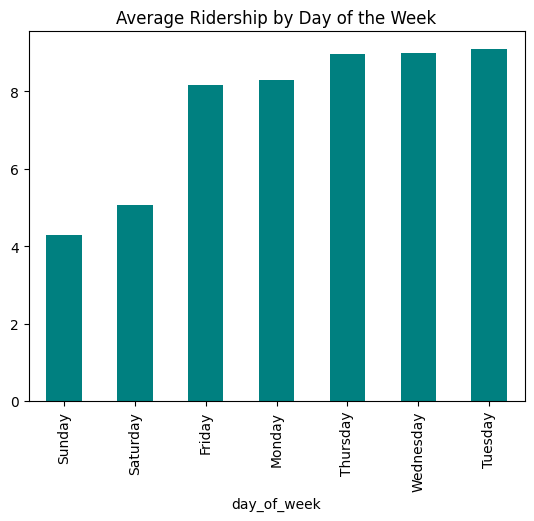

In [ ]:
# Monthly ridership trends
monthly_ridership = data.groupby(data['date'].dt.to_period('M'))['Number of Exits'].sum()
monthly_ridership.plot(kind='line', figsize=(10, 5), title='Monthly Ridership Trends')
plt.ylabel('Total Exits')
plt.show()

# Day-wise ridership trends (average per weekday)
daywise_ridership = data.groupby('day_of_week')['Number of Exits'].mean().sort_values()
daywise_ridership.plot(kind='bar', title='Average Ridership by Day of the Week', color='teal')
plt.show()

In [ ]:
# Top 10 busiest days
busiest_days = data.groupby('date')['Number of Exits'].sum().nlargest(10)
print(busiest_days)

date
2018-06-12    498022
2019-10-02    474741
2019-11-07    460520
2018-09-27    454990
2018-11-08    454461
2018-09-26    454198
2018-09-20    453117
2018-09-12    452151
2018-10-24    449225
2018-04-17    448199
Name: Number of Exits, dtype: int64


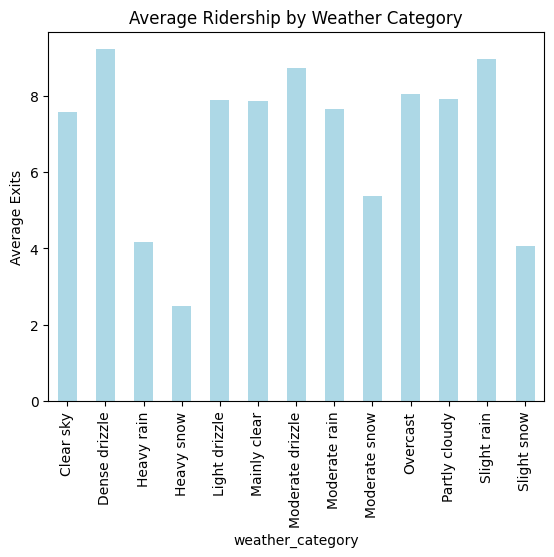

In [ ]:
weather_ridership = data.groupby('weather_category')['Number of Exits'].mean()
weather_ridership.plot(kind='bar', color='lightblue', title='Average Ridership by Weather Category')
plt.ylabel('Average Exits')
plt.show()

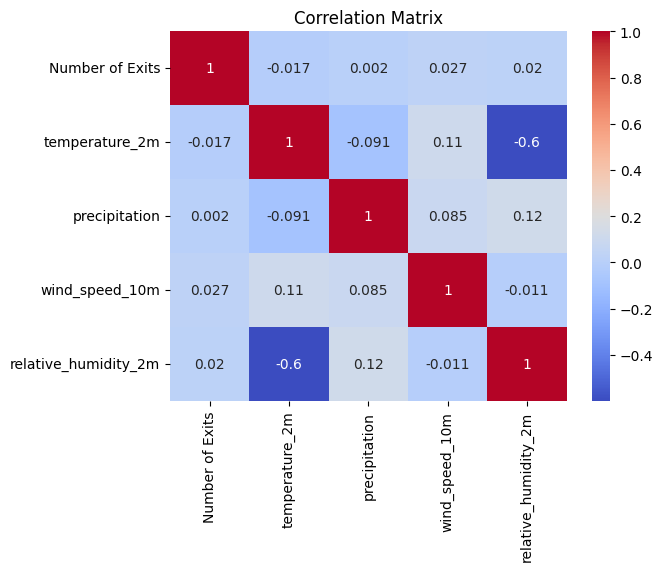

In [ ]:
correlation = data[['Number of Exits', 'temperature_2m', 'precipitation',
                    'wind_speed_10m', 'relative_humidity_2m']].corr()

# Plot a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

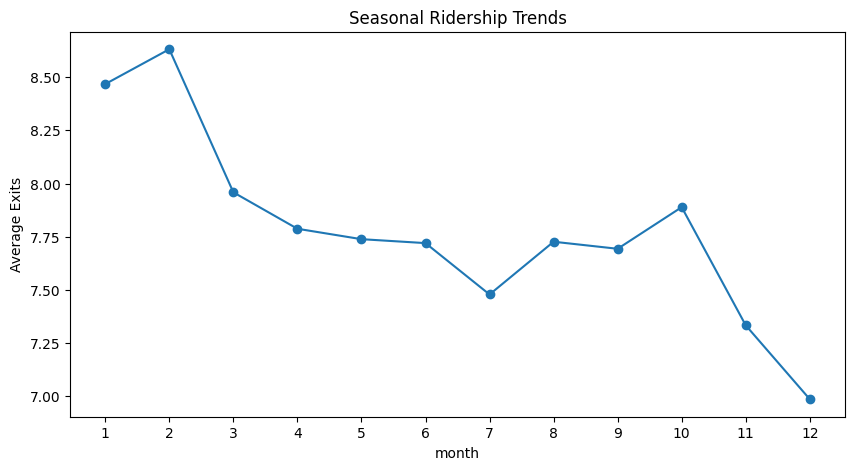

In [ ]:
data['month'] = data['date'].dt.month
seasonal_ridership = data.groupby('month')['Number of Exits'].mean()

seasonal_ridership.plot(kind='line', marker='o', title='Seasonal Ridership Trends', figsize=(10, 5))
plt.ylabel('Average Exits')
plt.xticks(range(1, 13))
plt.show()

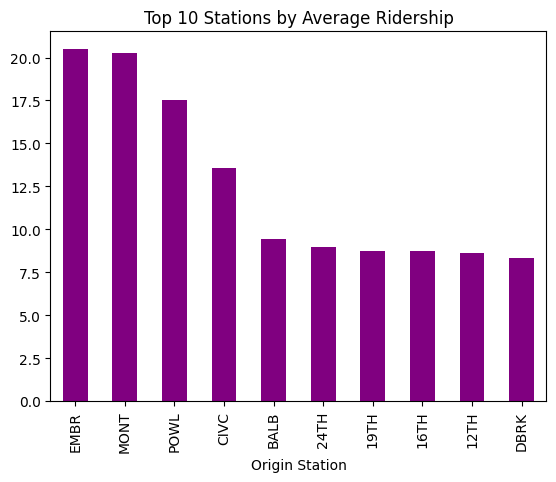

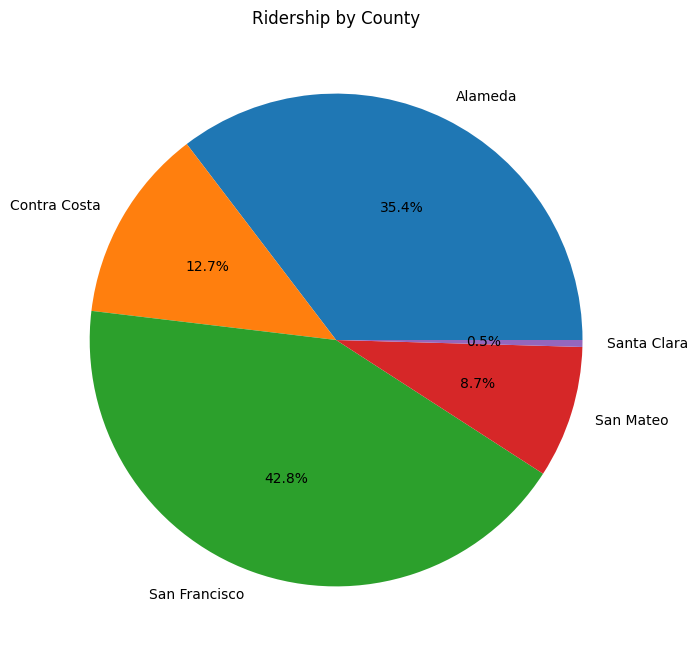

In [ ]:
station_ridership = data.groupby('Origin Station')['Number of Exits'].mean().nlargest(10)
station_ridership.plot(kind='bar', title='Top 10 Stations by Average Ridership', color='purple')
plt.show()

county_ridership = data.groupby('county')['Number of Exits'].sum()
county_ridership.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Ridership by County')
plt.ylabel('')
plt.show()

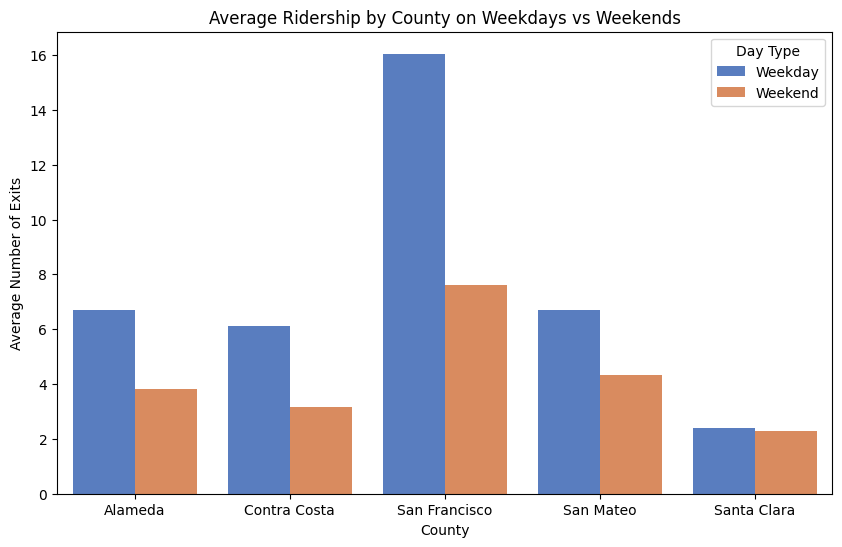

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to identify weekdays and weekends
data['day_type'] = data['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by county and day_type to get the average ridership
county_ridership = data.groupby(['county', 'day_type'])['Number of Exits'].mean().reset_index()

# Plotting the visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=county_ridership, x='county', y='Number of Exits', hue='day_type', palette='muted')
plt.title('Average Ridership by County on Weekdays vs Weekends')
plt.ylabel('Average Number of Exits')
plt.xlabel('County')
plt.legend(title='Day Type')
plt.show()


In [ ]:
# Extract Day of Week and Weekend Indicator
data['day_of_week'] = pd.to_datetime(data['date']).dt.day_name()
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Create Lag Feature (1 day lag for example)
data['ridership_lag_1'] = data['Number of Exits'].shift(24)  # 24-hour lag

# Create 7-day Moving Average of Ridership
data['ridership_7d_avg'] = data['Number of Exits'].rolling(window=7).mean()

# Handle any NaN values generated from shift or rolling operations
data.fillna(0, inplace=True)

# Display the first few rows to verify
print(data.head())


        date  hour Origin Station Destination Station  Number of Exits  Year  \
0 2018-01-01     0           12TH                12TH                3  2018   
1 2018-01-01     0           12TH                16TH                1  2018   
2 2018-01-01     0           12TH                BAYF                1  2018   
3 2018-01-01     0           12TH                CAST                3  2018   
4 2018-01-01     0           12TH                CIVC                2  2018   

    county  temperature_2m  precipitation  weather_code  ...  \
0  Alameda             9.0            0.0             1  ...   
1  Alameda             9.0            0.0             1  ...   
2  Alameda             9.0            0.0             1  ...   
3  Alameda             9.0            0.0             1  ...   
4  Alameda             9.0            0.0             1  ...   

   relative_humidity_2m  weather_category    holiday_name is_holiday  \
0                    95      Mainly clear  New Year's Day     

In [ ]:
# Encode Categorical Variables
encoder = LabelEncoder()

data['Origin Station'] = encoder.fit_transform(data['Origin Station'])
data['Destination Station'] = encoder.fit_transform(data['Destination Station'])
data['weather_category'] = encoder.fit_transform(data['weather_category'])
data['day_of_week'] = encoder.fit_transform(data['day_of_week'])
data['county'] = encoder.fit_transform(data['county'])

In [ ]:
# Splitting the data into pre-COVID and post-COVID
pre_covid_data = data[data['date'] < '2020-03-01']
post_covid_data = data[data['date'] >= '2020-03-01']

In [ ]:
def preprocess_data(df):
    features = ['hour', 'Origin Station', 'Destination Station', 'temperature_2m', 'precipitation',
                'wind_speed_10m', 'relative_humidity_2m', 'is_holiday', 'is_weekend']
    X = df[features].values
    y = df['Number of Exits'].values

    # Scaling the data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.reshape(-1, 1))

    # Reshape for LSTM
    X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,
                                                        test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, scaler

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(32))
    model.add(Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

    # Evaluate model
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss}')
    return model

# LSTM Model

In [ ]:
# Post-COVID LSTM Model
X_train_post, X_test_post, y_train_post, y_test_post, scaler_post = preprocess_data(post_covid_data)
print("Training Post-COVID Model...")
model_post = train_and_evaluate(X_train_post, X_test_post, y_train_post, y_test_post)

Training Post-COVID Model...
Epoch 1/5
347644/347644 ━━━━━━━━━━━━━━━━━━━━ 404s 1ms/step - loss: 7.9003e-05 - val_loss: 7.6368e-05
Epoch 2/5
347644/347644 ━━━━━━━━━━━━━━━━━━━━ 424s 1ms/step - loss: 7.6770e-05 - val_loss: 7.5799e-05
Epoch 3/5
347644/347644 ━━━━━━━━━━━━━━━━━━━━ 466s 1ms/step - loss: 7.5937e-05 - val_loss: 7.5336e-05
Epoch 4/5
347644/347644 ━━━━━━━━━━━━━━━━━━━━ 448s 1ms/step - loss: 7.5444e-05 - val_loss: 7.1907e-05
Epoch 5/5
347644/347644 ━━━━━━━━━━━━━━━━━━━━ 487s 1ms/step - loss: 7.1622e-05 - val_loss: 6.9637e-05
173822/173822 ━━━━━━━━━━━━━━━━━━━━ 112s 642us/step - loss: 6.9331e-05
Test Loss: 6.963723717490211e-05


In [ ]:
# Pre-COVID LSTM Model
X_train_pre, X_test_pre, y_train_pre, y_test_pre, scaler_pre = preprocess_data(pre_covid_data)
print("Training Pre-COVID Model...")
model_pre = train_and_evaluate(X_train_pre, X_test_pre, y_train_pre, y_test_pre)

Training Pre-COVID Model...
Epoch 1/5
273452/273452 ━━━━━━━━━━━━━━━━━━━━ 365s 1ms/step - loss: 7.2678e-04 - val_loss: 6.8331e-04
Epoch 2/5
273452/273452 ━━━━━━━━━━━━━━━━━━━━ 375s 1ms/step - loss: 6.4262e-04 - val_loss: 5.1171e-04
Epoch 3/5
273452/273452 ━━━━━━━━━━━━━━━━━━━━ 360s 1ms/step - loss: 4.9883e-04 - val_loss: 4.2088e-04
Epoch 4/5
273452/273452 ━━━━━━━━━━━━━━━━━━━━ 374s 1ms/step - loss: 4.0746e-04 - val_loss: 3.4820e-04
Epoch 5/5
273452/273452 ━━━━━━━━━━━━━━━━━━━━ 378s 1ms/step - loss: 3.3185e-04 - val_loss: 2.9512e-04
136726/136726 ━━━━━━━━━━━━━━━━━━━━ 83s 604us/step - loss: 2.9440e-04
Test Loss: 0.00029512582113966346


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Function to calculate metrics
def calculate_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")

# Make predictions on the test data (Post-COVID)
y_pred_post = model_post.predict(X_test_post)
y_pred_post = scaler_post.inverse_transform(y_pred_post)
y_test_post = scaler_post.inverse_transform(y_test_post)

print("Post-COVID Model Metrics:")
calculate_metrics(y_test_post, y_pred_post)

173822/173822 ━━━━━━━━━━━━━━━━━━━━ 99s 571us/step
Post-COVID Model Metrics:
RMSE: 8.586821072795951
MAE: 3.8715060723845625
MAPE: 142.12388665619287%


In [ ]:
# Make predictions on the test data (Pre-COVID)
y_pred_pre = model_pre.predict(X_test_pre)
y_pred_pre = scaler_pre.inverse_transform(y_pred_pre)
y_test_pre = scaler_pre.inverse_transform(y_test_pre)

print("\nPre-COVID Model Metrics:")
calculate_metrics(y_test_pre, y_pred_pre)

136726/136726 ━━━━━━━━━━━━━━━━━━━━ 79s 575us/step

Pre-COVID Model Metrics:
RMSE: 19.996600594923546
MAE: 8.715058270062922
MAPE: 220.4372014452165%


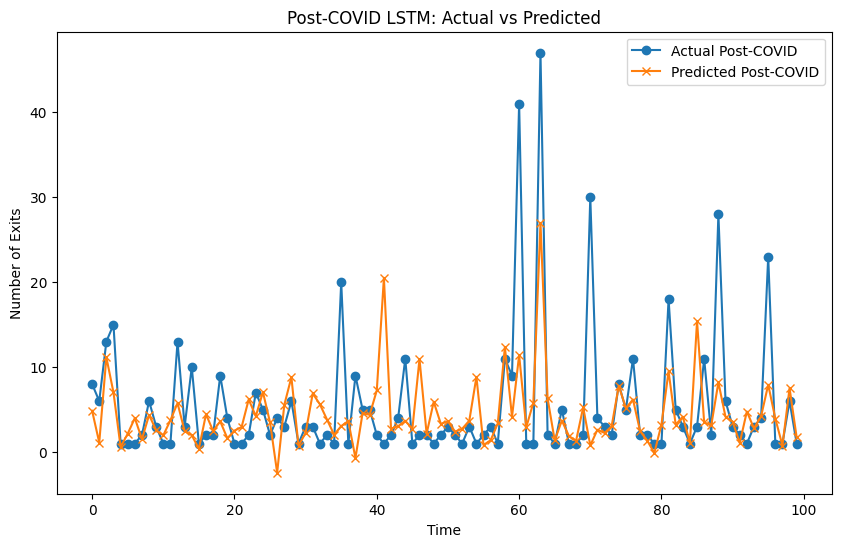

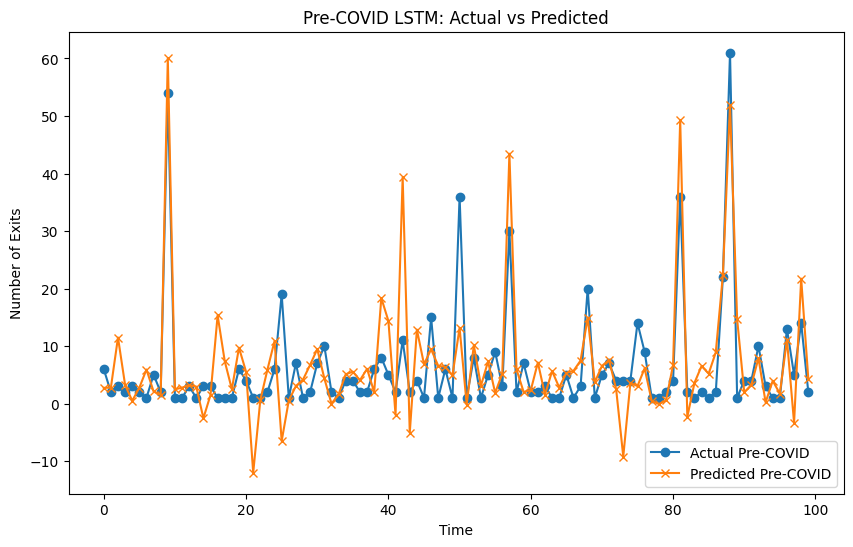

In [ ]:
# Plotting Actual vs Predicted for Post-COVID Model
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_post[:100], label='Actual Post-COVID', marker='o')
plt.plot(y_pred_post[:100], label='Predicted Post-COVID', marker='x')
plt.title('Post-COVID LSTM: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Number of Exits')
plt.legend()
plt.show()

# Plotting Actual vs Predicted for Pre-COVID Model
plt.figure(figsize=(10, 6))
plt.plot(y_test_pre[:100], label='Actual Pre-COVID', marker='o')
plt.plot(y_pred_pre[:100], label='Predicted Pre-COVID', marker='x')
plt.title('Pre-COVID LSTM: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Number of Exits')
plt.legend()
plt.show()


In [ ]:
# Save the trained LSTM model
model_pre.save('lstm_model_pre_covid.h5')
model_post.save('lstm_model_post_covid.h5')

# TCN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling1D
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test, scaler = preprocess_data(data)

In [ ]:
# Step 2: Build the TCN Model
def build_tcn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.3),

        Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        Dropout(0.3),

        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer for regression
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Step 3: Initialize and Train the Model
input_shape = (X_train.shape[1], X_train.shape[2])
tcn_model = build_tcn_model(input_shape)

W0000 00:00:1731966197.800057      25 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
# Train the model
history = tcn_model.fit(
    X_train, y_train,
    epochs=5,  # Start with fewer epochs, adjust later if needed
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/5
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 2334s 4ms/step - loss: 0.0018 - val_loss: 3.6905e-04
Epoch 2/5
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 2109s 3ms/step - loss: 3.7154e-04 - val_loss: 3.6197e-04
Epoch 3/5
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 1958s 3ms/step - loss: 3.6990e-04 - val_loss: 3.5359e-04
Epoch 4/5
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 1961s 3ms/step - loss: 3.6794e-04 - val_loss: 3.6066e-04
Epoch 5/5
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 1963s 3ms/step - loss: 3.6894e-04 - val_loss: 3.6518e-04


In [ ]:
# Step 4: Evaluate the Model
test_loss = tcn_model.evaluate(X_test, y_test, verbose=0)
y_pred = tcn_model.predict(X_test)

310548/310548 ━━━━━━━━━━━━━━━━━━━━ 415s 1ms/step


In [ ]:
# Rescale predictions back to original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [ ]:
# Calculate Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Test Loss: {test_loss}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

Test Loss: 0.0003651810111477971
RMSE: 22.24381404733655
MAE: 8.577728092463175
MAPE: 321.32751609796236%


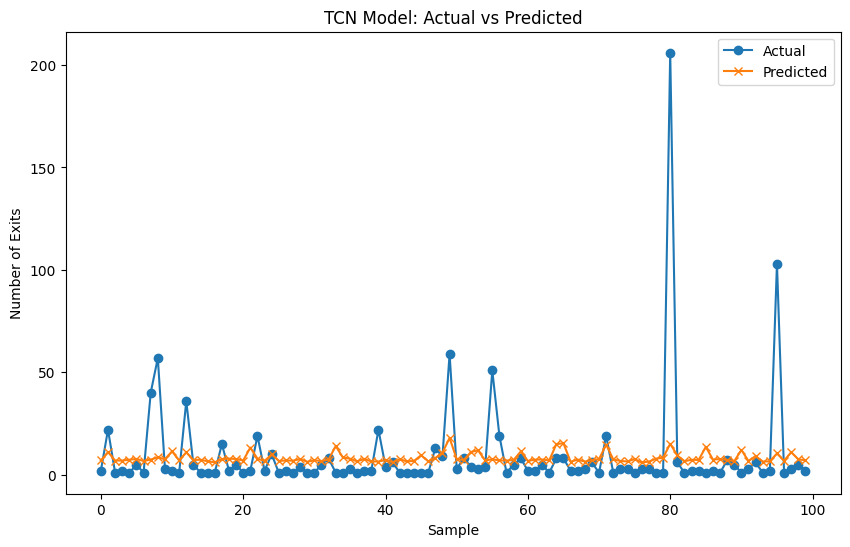

In [ ]:
# Step 5: Plot Predictions vs Actual Values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('TCN Model: Actual vs Predicted')
plt.xlabel('Sample')
plt.ylabel('Number of Exits')
plt.legend()
plt.show()

# TCN with Sliding Window Approach

In [ ]:
# Define a function to preprocess data using the sliding window approach
def preprocess_data_with_sliding_window(df, window_size=7):
    features = ['hour', 'Origin Station', 'Destination Station', 'temperature_2m', 'precipitation',
                'wind_speed_10m', 'relative_humidity_2m', 'is_holiday', 'is_weekend']
    target = 'Number of Exits'

    X, y = [], []
    for i in range(len(df) - window_size):
        # Extract sliding window data
        X.append(df[features].iloc[i:i + window_size].values)
        y.append(df[target].iloc[i + window_size])

    X = np.array(X)
    y = np.array(y)

    # Scaling the data
    scaler = MinMaxScaler()
    X_shape = X.shape
    X = X.reshape(-1, X.shape[-1])  # Flatten for scaling
    X_scaled = scaler.fit_transform(X).reshape(X_shape)  # Reshape back after scaling
    y_scaled = scaler.fit_transform(y.reshape(-1, 1))

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,
                                                        test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test, scaler

In [ ]:
# Preprocess the entire dataset using the sliding window approach
X_train, X_test, y_train, y_test, scaler = preprocess_data_with_sliding_window(data)

KeyboardInterrupt: 

In [ ]:
# Define the TCN model
def build_tcn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer for regression

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Train and evaluate the TCN model
def train_and_evaluate_tcn(X_train, X_test, y_train, y_test, scaler):
    # Build Model
    input_shape = (X_train.shape[1], X_train.shape[2])
    tcn_model = build_tcn_model(input_shape)

    # Train Model
    history = tcn_model.fit(X_train, y_train, epochs=5, batch_size=64,
                            validation_data=(X_test, y_test), verbose=1)

    # Evaluate Model
    test_loss = tcn_model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Loss: {test_loss}")

    # Predict
    y_pred = tcn_model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test)

    # Calculate Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}%")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[:100], label='Actual')
    plt.plot(y_pred[:100], label='Predicted')
    plt.title('TCN Model: Actual vs Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Number of Exits')
    plt.legend()
    plt.show()

    return tcn_model, history

In [ ]:
# Train and evaluate TCN on the entire dataset
print("Training TCN Model on the Entire Dataset...")
tcn_model, history = train_and_evaluate_tcn(X_train, X_test, y_train, y_test, scaler)